# Principal Component Analysis (PCA)

Wir wollen zuerst die PCA anhand eines einfachen Beispiel mit Hilfe der Linearen Algebra "händisch" durchführen. Anschließend verwendenw wir die Klasse *PCA* aus dem Package *sklearn.decomposition*.

## Eigenständige Durchführung der PCA
Wir erstellen zuerst einen simplen, 2-Dimensionalen Datensatz und erstellen daraus einen Scatterplot.

    X    Y
0   1   12
1   3   34
2   7   67
3   8   99
4  10  133
5  12  159
6  17  167
7  25  198


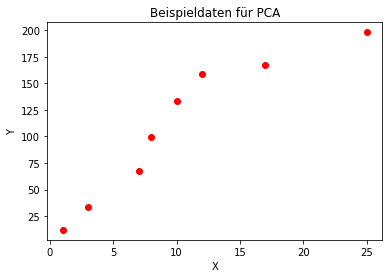

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"X":[1,3,7,8,10,12,17,25],
                   "Y":[12,34,67,99,133,159,167,198]})

print(df)

plt.scatter(df.X, df.Y, color="r")
plt.title("Beispieldaten für PCA")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Nun skalieren wir die Daten und zentrieren diese. Wir subtrahieren von den X- und Y-Werten jeweils deren Mittelwerte.

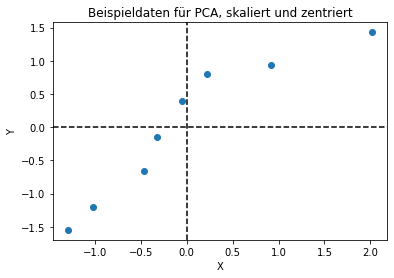

In [2]:
from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame(StandardScaler().fit_transform(df[["X", "Y"]]), columns=df.columns)
x_mean = df_scaled.X.mean()
y_mean = df_scaled.Y.mean()

df_centered = pd.DataFrame({"X": df_scaled.X-x_mean, "Y": df_scaled.Y - y_mean}, columns = df.columns)

plt.scatter(df_centered.X, df_centered.Y)
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='--')
plt.title("Beispieldaten für PCA, skaliert und zentriert")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Nun berechnen wir die Kovarianz-Matrix sowie die Eigenwerte (eigw) und Eigenvektoren (eigv).

In [3]:
import numpy as np

kovmatr = pd.DataFrame.cov(df_centered)
print("Kovarianzmatrix:\n")
print(kovmatr)
print()

# Berechne Eigenwerte und Eigenvektoren
eigw, eigv = np.linalg.eig(kovmatr)

print(f"Eigenwerte: {eigw},\nEigenvektoren:\n {eigv}")

Kovarianzmatrix:

          X         Y
X  1.142857  1.068206
Y  1.068206  1.142857

Eigenwerte: [2.2110636  0.07465068],
Eigenvektoren:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Wir multiplizieren unsere zenrierten Daten mit dem Eigenvektor:

In [4]:
df_1dim1 = df_centered @ eigv[1]
print(df_1dim1)

0   -2.008092
1   -1.564013
2   -0.800289
3   -0.340691
4    0.239135
5    0.728464
6    1.306985
7    2.438502
dtype: float64


## Vergleich mit Klasse PCA
Wir verwenden nun die Klasse *PCA* aus dem Package *sklearn.decomposition*. Als Daten übergeben wir die skalierten Daten. Eine Zentrierung erledigt die *fit*-Methode für uns.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(df_scaled)
print(f"Eigenvektor: {pca.components_}")
print(f"Eigenwert: {pca.explained_variance_}")
print("Tranformierte Daten: \n")
df_1dim2 = pca.transform(df_scaled)
print(df_1dim2)

Eigenvektor: [[0.70710678 0.70710678]]
Eigenwert: [2.2110636]
Tranformierte Daten: 

[[-2.00809186]
 [-1.56401257]
 [-0.80028909]
 [-0.34069149]
 [ 0.2391352 ]
 [ 0.72846363]
 [ 1.30698456]
 [ 2.43850161]]


## Beispiel: PCA mit IRIS

Wir erstellen ein Modell Random Forest (Klassifikation), um die IRIS-Spezies vorherzusagen. Zuerst mit allen 4 Features, danach mit Hilfe von PCA auf 2 Features reduziert. Wir berechnen jeweils die Accuracy.

In [6]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = load_iris()

X = StandardScaler().fit_transform(data.data)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3, random_state=23)


In [7]:
from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
print(forest1.score(X_test, y_test))

0.9777777777777777


Wir reduzieren auf nur 2 Features:

In [8]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

forest2 = RandomForestClassifier(n_estimators=100).fit(X_train_pca, y_train)
print(forest2.score(X_test_pca, y_test))

0.9333333333333333


Wir reduzieren auf nur 2 Features:

In [9]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

forest3 = RandomForestClassifier(n_estimators=100).fit(X_train_pca, y_train)
print(forest3.score(X_test_pca, y_test))

0.8888888888888888
